In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [6]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Shubham\SEM7\AIML\EXP6\file.txt')

In [7]:
df.head()

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [8]:
df.shape

(5485, 1)

In [9]:
df.isnull().sum()

5485    0
dtype: int64

In [10]:
def get_label(text):
     for i in text:
            return int(i[0])

In [11]:
df['label'] = df['5485'].apply(lambda x: get_label(x))

In [12]:
df.head()

,5485,label
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1


In [13]:
df.columns = ('text', 'label')

In [14]:
df.head()

,text,label
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1


In [15]:
df['text']=df['text'].str[1:]

In [16]:
df.head()

,text,label
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1
3,am international inc am nd qtr jan oper shr l...,1
4,brown forman inc bfd th qtr net shr one dlr v...,1


In [17]:
df.tail()

,text,label
5480,kelly oil and gas partners kly year dec shr c...,1
5481,japan seeks to strengthen paris currency acco...,8
5482,tcw convertible securities cvt sets dividend ...,1
5483,south korean won fixed at month high the bank...,8
5484,australian unions launch new south wales stri...,4


<AxesSubplot:>

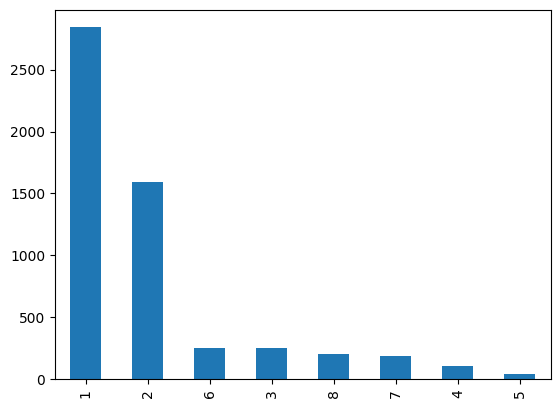

In [18]:
df.label.value_counts().plot(kind='bar')

In [19]:
#remove special characters and punctuation
df['text'] = df['text'].replace(r'[^A-Za-z0-9 ]+', '')

#remove single letters from text
df['text'] = df['text'].apply (lambda x: re.sub(r"((?<=^)|(?<= )).((?=$)|(?= ))", '', x).strip())

In [20]:
df.sample(10)

,text,label
5020,upland minerals acquires brazil mining firm up...,2
2250,tech data corp tecd th qtr ends jan net shr ct...,1
3081,asset investors mir in initial payout asset...,1
2767,emhart corp emh set to increase earnings emhar...,1
3867,bi inc biac sets reverse split bi inc said it ...,1
3250,marcus mrcs votes pct stock dividend marcus co...,1
3600,american cyanamid acy changes record date amer...,1
4625,republic rsla to merge with pioneer savings re...,2
3152,autoclave engineers inc aclv qtly dividend qtl...,1
4483,bass group says it has had talks on taft tfb ...,2


In [21]:
vectorizer = CountVectorizer(stop_words='english')

In [22]:
X = df['text']
y = df['label']

In [23]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 88)

In [24]:
X_vect = vectorizer.fit_transform(X_train)

In [25]:
nb = MultinomialNB()

In [26]:
nb.fit(X_vect,y_train)

MultinomialNB()

In [27]:
y_pred = nb.predict(vectorizer.transform(X_test))

In [29]:
Accuracy = metrics.accuracy_score(y_test, y_pred) 
Precision = metrics.precision_score(y_test, y_pred) 
recall = metrics.recall_score(y_test, y_pred) 
Specificity = metrics.recall_score(y_test, y_pred, pos_label=3) 
F1_score = metrics.f1_score(y_test, y_pred)

NameError: name 'metrics' is not defined